In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
print len(messages)

5574


In [4]:
for num, message in enumerate(messages[:10]):
    print num, message
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [6]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


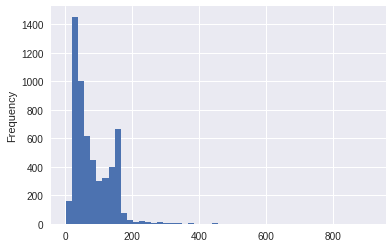

In [10]:
messages['length'].plot(kind='hist', bins=50)

In [11]:
messages['length'].describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76e5e2dc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f76e5c91090>], dtype=object)

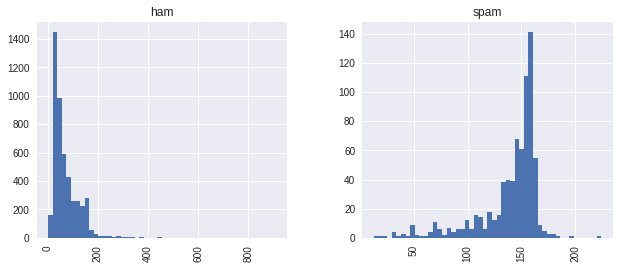

In [13]:
messages.hist(bins=50, column='length', by='label',figsize=(10,4))

In [14]:
import string 

In [15]:
mess = "Sample Message! Notice: It has punctuations!!"
print mess

Sample Message! Notice: It has punctuations!!


In [16]:
no_punc = [char for char in mess if char not in string.punctuation]
no_punc = ''.join(no_punc)
print no_punc

Sample Message Notice It has punctuations


In [17]:
from nltk.corpus import stopwords

In [18]:
stopwords.words('french')[0:15]

[u'au',
 u'aux',
 u'avec',
 u'ce',
 u'ces',
 u'dans',
 u'de',
 u'des',
 u'du',
 u'elle',
 u'en',
 u'et',
 u'eux',
 u'il',
 u'je']

In [19]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
print clean_mess

['Sample', 'Message', 'Notice', 'punctuations']


In [20]:
def text_process(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [21]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer.fit(messages['message'])

/home/harry/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


CountVectorizer(analyzer=<function text_process at 0x7f76e59e5488>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
        vocabulary=None)

In [61]:
message50= messages['message'][49]
print message50

U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.


In [62]:
bow50 = bow_transformer.transform([message50])
print bow50
# Gives the word matches from corpus and their frequencies

  (0, 2271)	1
  (0, 2352)	1
  (0, 2794)	1
  (0, 4068)	1
  (0, 6014)	1
  (0, 6123)	1
  (0, 6369)	1
  (0, 6864)	1
  (0, 7192)	1
  (0, 7594)	1
  (0, 7639)	1
  (0, 10143)	1
  (0, 10184)	1
  (0, 10185)	1
  (0, 10355)	1
  (0, 10945)	1
  (0, 10983)	2


In [63]:
print bow_transformer.get_feature_names()[6123]
print bow_transformer.get_feature_names()[7594]
print bow_transformer.get_feature_names()[10983]

dont
kept
weak


In [64]:
messages_bow = bow_transformer.transform(messages['message'])
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

/home/harry/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf50 = tfidf_transformer.transform(bow50)
print tfidf50

  (0, 10983)	0.516252299909
  (0, 10945)	0.145537353872
  (0, 10355)	0.227358339118
  (0, 10185)	0.287631039777
  (0, 10184)	0.287631039777
  (0, 10143)	0.287631039777
  (0, 7639)	0.133741551205
  (0, 7594)	0.242991864717
  (0, 7192)	0.239199208774
  (0, 6864)	0.134702827313
  (0, 6369)	0.187374731421
  (0, 6123)	0.139504315655
  (0, 6014)	0.170925963336
  (0, 4068)	0.127713272483
  (0, 2794)	0.247291623396
  (0, 2352)	0.127047034408
  (0, 2271)	0.287631039777


In [69]:
# To find out the IDF of a word
print tfidf_transformer.idf_[bow_transformer.vocabulary_[bow_transformer.get_feature_names()[10983]]]

8.01625087514


In [70]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf.shape

(5572, 11425)

In [71]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [72]:
print 'predicted:', spam_detect_model.predict(tfidf4)[0]
print 'expected:', messages.label[3]

predicted: ham
expected: ham


In [73]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print all_predictions

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [74]:
from sklearn.metrics import classification_report
print classification_report(messages['label'], all_predictions)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [75]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

4457 1115 5572


/home/harry/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
# Creating a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [77]:
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print classification_report(predictions,label_test)

/home/harry/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1008
       spam       0.66      1.00      0.80       107

avg / total       0.97      0.95      0.96      1115

